In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [69]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [70]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [71]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [74]:
# Drop ID
df.drop(['id'],axis=1, inplace=True)

In [75]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [76]:
#handling null in bmi

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [77]:
# removing others from gender

df=df[df['gender']!='Other']
df.drop('ever_married',axis=1,inplace=True)

In [78]:
df = pd.get_dummies(df).astype(int)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202,28,1,1,0,0,0,0,1,0,1,0,0,0,1,0
2,80,0,1,105,32,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171,34,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174,24,1,1,0,0,0,0,1,0,1,0,0,0,1,0


In [79]:
#separating the features
X=df.drop('stroke', axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202,28,1,0,0,0,0,1,0,1,0,0,0,1,0
2,80,0,1,105,32,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171,34,1,0,0,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174,24,1,0,0,0,0,1,0,1,0,0,0,1,0


In [80]:
#target variable

y=df['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int32

In [81]:
X.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

<Axes: xlabel='bmi'>

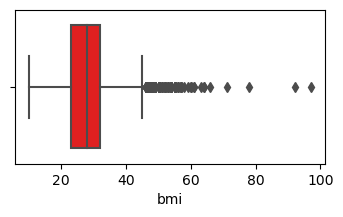

In [82]:
plt.figure(figsize=(4,2))
sns.boxplot(x= df["bmi"], color="red")
#X['BMI']

In [83]:
# Rebalancing

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Apply SMOTE to rebalance the class distribution
smote = SMOTE(sampling_strategy="minority")
X, y = smote.fit_resample(X,y)

print("\nClass distribution after SMOTE:")
print(y.value_counts())


Class distribution after SMOTE:
1    4860
0    4860
Name: stroke, dtype: int64


In [84]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# standardising to keep the features in the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [86]:
X_train

array([[ 0.60018705, -0.30555414, -0.22635589, ..., -0.38261652,
        -0.60647343, -0.33152043],
       [-1.76746628, -0.30555414, -0.22635589, ..., -0.38261652,
        -0.60647343, -0.33152043],
       [-0.53810782, -0.30555414, -0.22635589, ...,  2.61358293,
        -0.60647343, -0.33152043],
       ...,
       [ 1.14656858, -0.30555414,  4.41782191, ..., -0.38261652,
        -0.60647343, -0.33152043],
       [-0.40151243, -0.30555414, -0.22635589, ..., -0.38261652,
        -0.60647343,  3.01640536],
       [ 1.10103679, -0.30555414, -0.22635589, ..., -0.38261652,
         1.64887684, -0.33152043]])

In [87]:
y_train.value_counts()

1    3892
0    3884
Name: stroke, dtype: int64

# KNN Classifier

In [109]:
#KNN start

knn = KNeighborsClassifier(n_neighbors=10)

# Training the model
knn.fit(X_train, y_train)

# Prediction on the test set

y_pred = knn.predict(X_test)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[960  16]
 [ 60 908]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       976
           1       0.98      0.94      0.96       968

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944



In [89]:
# KNN end
knn.score(X_test,y_test)

0.9655349794238683

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Training the model on resampled data
rf_classifier.fit(X_train, y_train)

# Prediction on the test set
y_pred = rf_classifier.predict(X_test)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[963  13]
 [ 52 916]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       976
           1       0.99      0.95      0.97       968

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944



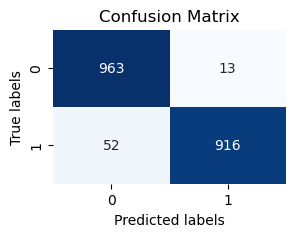

In [91]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [92]:
#accuracy score
print(accuracy_score(y_test,y_pred))

0.9665637860082305


In [102]:
# random forest with 0.3 threshold to make sure that we have lesser false negatives

y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Apply custom threshold (0.3)
threshold = 0.3
y_pred_custom_threshold = (y_pred_proba >= threshold).astype(int)

# Model Evaluation with custom threshold
print("Confusion Matrix with custom threshold:")
print(confusion_matrix(y_test, y_pred_custom_threshold))
print(classification_report(y_test, y_pred_custom_threshold))


Confusion Matrix with custom threshold:
[[880  96]
 [ 23 945]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       976
           1       0.91      0.98      0.94       968

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



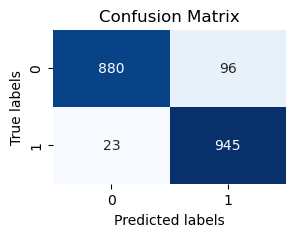

In [100]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom_threshold)

# Plot confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Additional Trials

# XGBoost

In [69]:
#!pip install XGBoost

In [109]:
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [110]:
d_train = xgb.DMatrix(data = X_train, label = y_train)

In [111]:
param_xg = {'objective':'multi:softmax','num_class': 3 }

In [112]:
d_test = xgb.DMatrix(data = X_test, label = y_test)

In [113]:
xg_run = xg.train(param_xg, d_train)

In [114]:
y_pred = xg_run.predict(d_test)
y_pred

array([0., 0., 0., ..., 0., 0., 2.], dtype=float32)

In [115]:
# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[37478     0   638]
 [  847     0    59]
 [ 5993     0   942]]


# XGBoost Sklearn

In [201]:
# # categorical features:
# X_train[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']].astype("category")


In [151]:
#from sklearn.utils.class_weight import compute_sample_weight

In [134]:
# s_w = compute_sample_weight( class_weight='balanced', y = y_train)

In [135]:
# from sklearn.model_selection import KFold, cross_val_score

In [316]:
#ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

clf = xgb.XGBClassifier(n_estimators=100,
    max_depth=5,
    learning_rate=0.2,
    objective='binary:logistic',
    random_state=42) #, enable_categorical = False) #, scale_pos_weight = ratio)

clf.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [317]:
y_pred = clf.predict(X_test)

In [318]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [319]:
# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[406 554]
 [ 11 949]]


In [282]:
# Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       960
           1       0.06      1.00      0.11        62

    accuracy                           0.07      1022
   macro avg       0.53      0.50      0.06      1022
weighted avg       0.94      0.07      0.02      1022

